In [1]:
#Dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# list of tv show titles to query
tv_shows = ["Altered Carbon", "Grey's Anatomy", "This is Us", "The Flash",
            "Vikings", "Shameless", "Arrow", "Peaky Blinders", "Dirk Gently"]

# tv maze show search base url
base_url = "http://api.tvmaze.com/search/shows?q="

# set up lists to hold response data for name and rating
titles = []
ratings = []
networks = []

# loop through tv show titles, make requests and parse
for show in tv_shows:
    target_url = base_url + show
    response = requests.get(target_url).json()
    titles.append(response[0]['show']['name'])
    ratings.append(response[0]['show']['rating']['average'])

In [3]:
# create dataframe
shows_df = pd.DataFrame({
    "title": titles,
    "rating": ratings
})

shows_df

,rating,title
0,8.7,Altered Carbon
1,8.1,Grey's Anatomy
2,8.2,This Is Us
3,8.2,The Flash
4,8.9,Vikings
5,8.8,Shameless
6,7.7,Arrow
7,9.0,Peaky Blinders
8,7.5,Dirk Gently


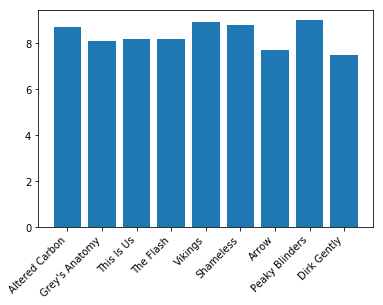

In [4]:
# create a list of numbers for x values
tick_locations = np.arange(len(shows_df))

# create bar chart and set the values of xticks
plt.bar(tick_locations, shows_df['rating'], align="center")
plt.xticks(tick_locations, shows_df['title'], rotation=45, ha="right")

plt.savefig("tv_show_ratings.png")
plt.show()